In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:\\Users\\satyam chauhan\\OneDrive\\Desktop\\intersavy task\\link 1\\Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


# checking for null value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


finding null value

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

plotting null value

<AxesSubplot:>

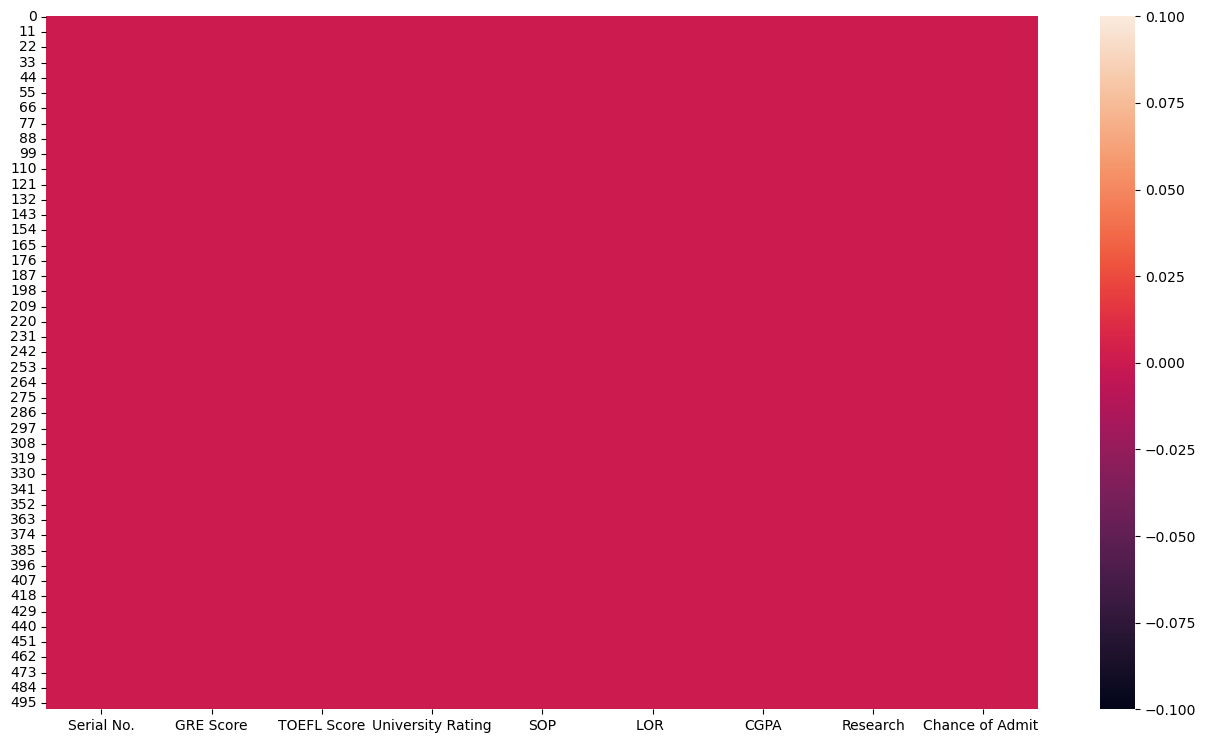

In [8]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# spilit data set for train and test dataset

In [9]:
len_train=df.shape[0]
len_train

500

In [10]:
df_co=df.copy()

In [11]:
x=df_co.drop("GRE Score",axis=1)
y=df_co["GRE Score"]

print("shape of x=",x.shape)
print("shape of y=",y.shape)

shape of x= (500, 8)
shape of y= (500,)


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)


print("shape of x_train=",x_train.shape)
print("shape of y_train=",y_train.shape)
print("shape of x_test=",x_test.shape)
print("shape of y_test=",y_test.shape)

shape of x_train= (400, 8)
shape of y_train= (400,)
shape of x_test= (100, 8)
shape of y_test= (100,)


# satndardisation

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
 
sc.fit(x_train)   
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

# check for best Classification ML Model

In [14]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [15]:
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()

In [16]:
svr.fit(x_train,y_train)

SVR()

In [17]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [18]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [19]:
svr.score(x_test,y_test)

0.687303571797007

In [20]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [21]:
dtr.score(x_test,y_test)

0.20693443289040048

In [22]:
knr.score(x_test,y_test)

0.5999571112549096

In [23]:
rfr.score(x_test,y_test)

0.6449257723736285

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [25]:
gpr= GaussianProcessRegressor ()

In [26]:
gpr.fit(x_test,y_test)

GaussianProcessRegressor()

In [27]:
gpr.score(x_test,y_test)

1.0

# so gpr is best algo

In [30]:
gpr.predict([x_test[6,:]])

array([312.99999998])

In [31]:
gpr.predict([x_test[2,:]])

array([321.00000002])

In [32]:
gpr.predict([x_test[4,:]])

array([308.00000001])